# Proyek Klasifikasi Gambar: Fruits Classification 🍇
- **Nama:** Dila Aura Futri
- **Email:** mrkhyuck.dila@gmail.com
- **ID Dicoding:** [Input Username]

## Import Semua Packages/Library yang Digunakan

In [86]:
!pip install pipreqs


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [87]:
!pip install tensorflowjs


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [88]:
# =============================
# 📦 Built-in & Utility Libraries
# =============================
import os, shutil, zipfile, random, warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path

# =============================
# 📊 Visualization
# =============================
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 🖼️ Image Processing
# =============================
import cv2
from PIL import Image
from skimage import io, img_as_ubyte
from skimage.transform import resize, rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# =============================
# 🤖 Machine Learning & Deep Learning
# =============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, Conv2D, SeparableConv2D, MaxPooling2D,
                                     Dense, Flatten, Dropout, BatchNormalization,
                                     GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNet, DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# =============================
# 📁 Local File Handling
# =============================
def upload_file():
    file_path = input("Enter the path to your file: ")
    print(f"File path provided: {file_path}")
    return file_path

def download_file(source_path, destination_path):
    shutil.copy(source_path, destination_path)
    print(f"File downloaded to: {destination_path}")


In [89]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.19.0


## Data Preparation

### Data Loading

In [90]:
import os
from dotenv import load_dotenv

# Load environment variables from a .env file
load_dotenv()

# # Fetch Kaggle credentials from environment variables
# kaggle_username = os.getenv('KAGGLE_USERNAME', 'your_kaggle_username')
# kaggle_key = os.getenv('KAGGLE_KEY', 'your_kaggle_key')

# # Set environment variables for Kaggle
# os.environ['KAGGLE_USERNAME'] = kaggle_username
# os.environ['KAGGLE_KEY'] = kaggle_key


False

In [91]:
!rm -rf fruits-classification/

In [92]:
# !kaggle datasets download -d utkarshsaxenadn/fruits-classification

In [93]:
# Ekstrak dataset
!unzip fruits-classification.zip -d fruits-classification


#https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification/code

Archive:  fruits-classification.zip
  inflating: fruits-classification/Fruits Classification/data_splitting.py  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1133).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1153).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (12).png  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1348).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1413).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1415).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1423).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1526).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1555).jpeg  
  inflating: fruits-classification/Fruits Classification/test/Apple/Apple (1624).jpeg  
  inflatin

### Data Preprocessing

In [94]:
import os
import shutil
# Cek apakah folder utama ada
print("Cek folder utama:", os.path.exists("fruits-classification"))

# Cek apakah subfolder train ada
print("Cek folder train:", os.path.exists("fruits-classification/train"))

# Cek apakah subfolder test ada
print("Cek folder test:", os.path.exists("fruits-classification/test"))

# Cek apakah subfolder valid ada
print("Cek folder valid:", os.path.exists("fruits-classification/valid"))


Cek folder utama: True
Cek folder train: False
Cek folder test: False
Cek folder valid: False


In [95]:
import os
import shutil

# Direktori asal untuk train, test, dan validation
train_dir = "fruits-classification/Fruits Classification/train"
test_dir = "fruits-classification/Fruits Classification/test"
valid_dir = "fruits-classification/Fruits Classification/valid"

# Direktori baru untuk dataset gabungan
combined_dir = "fruits-classification/dataset_combined"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Fungsi untuk menyalin data ke direktori gabungan
def copy_data(source_dir, target_dir):
    for category in os.listdir(source_dir):
        category_dir = os.path.join(source_dir, category)
        if os.path.isdir(category_dir):
            shutil.copytree(category_dir, os.path.join(target_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari train, test, dan validation
copy_data(train_dir, combined_dir)
copy_data(test_dir, combined_dir)
copy_data(valid_dir, combined_dir)

print("Dataset berhasil digabung ke dalam:", combined_dir)


Dataset berhasil digabung ke dalam: fruits-classification/dataset_combined


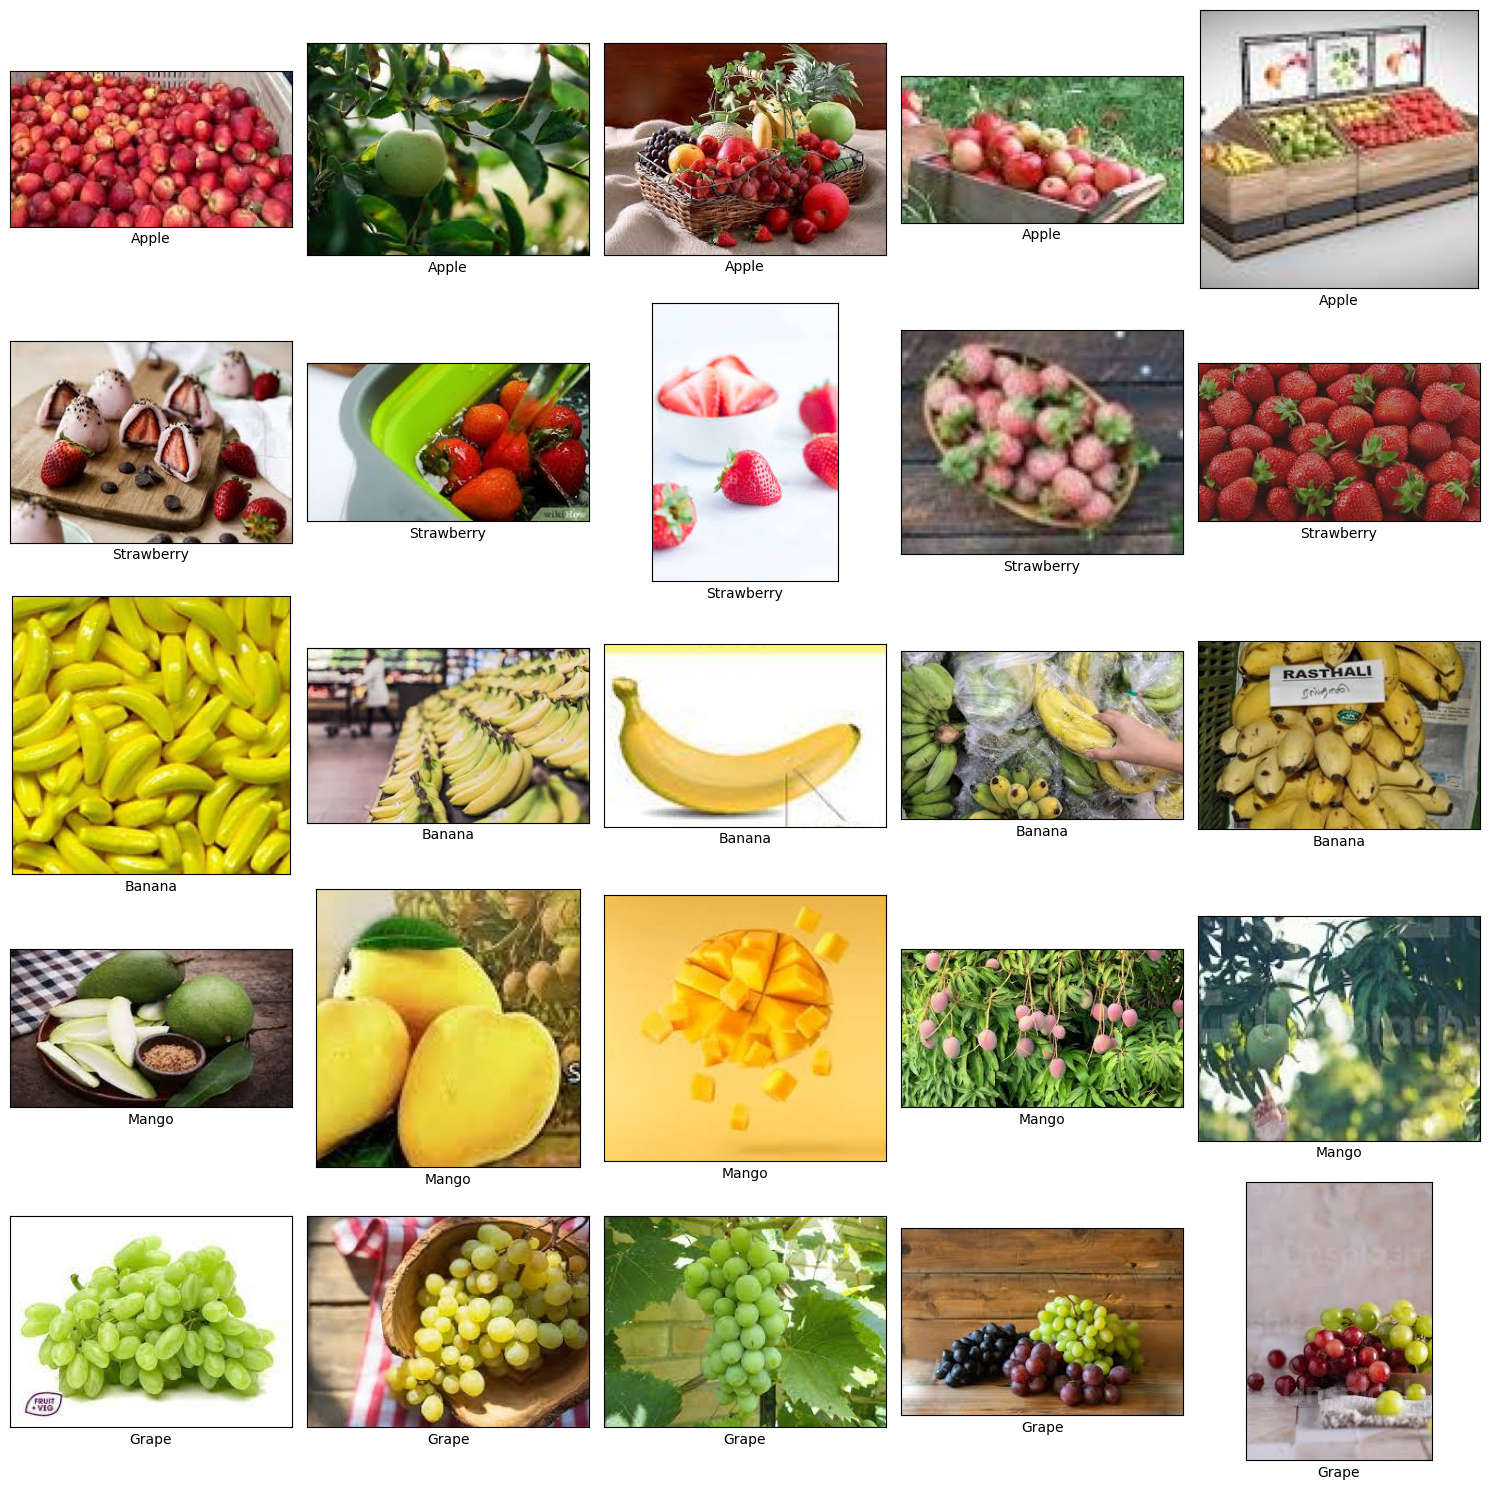

In [96]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
fruit_images = {}

# Tentukan path sumber train
path = "fruits-classification/"
path_sub = os.path.join(path, "dataset_combined")
for i in os.listdir(path_sub):
    fruit_images[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali.
path_sub = "fruits-classification/dataset_combined"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(fruit_images.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(fruit_images[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

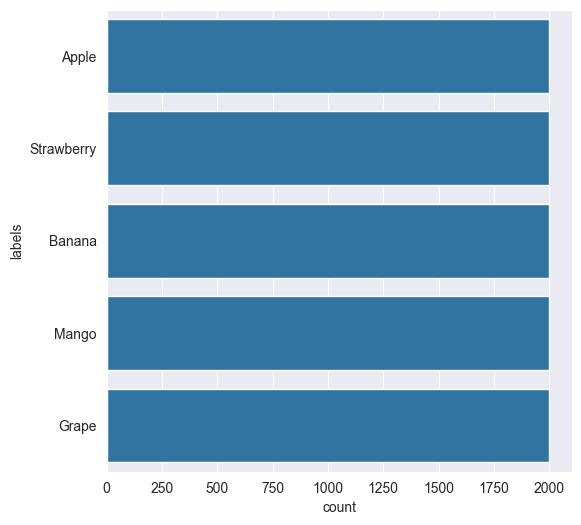

In [97]:
# Define source path
fruit_path = "fruits-classification/dataset_combined"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(fruit_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

#### Split Dataset

In [98]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= 'fruits-classification/dataset_combined'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)


# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
Apple         2000
Banana        2000
Grape         2000
Mango         2000
Strawberry    2000
dtype: int64

In [99]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=300)

In [100]:
# Menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})
df_val = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'valid'})


In [101]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))
print('valid size', len(df_val))

train size 6400
test size 2000
valid size 1600


In [102]:
# Gabungkan Train, Test, dan Validation
df_all = pd.concat([df_tr, df_te, df_val], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))



set    labels    
test   Apple          411
       Banana         405
       Grape          417
       Mango          383
       Strawberry     384
train  Apple         1250
       Banana        1279
       Grape         1276
       Mango         1291
       Strawberry    1304
valid  Apple          339
       Banana         316
       Grape          307
       Mango          326
       Strawberry     312
dtype: int64 


                                                   path      labels    set
7583  fruits-classification/dataset_combined/Mango/M...       Mango   test
3409  fruits-classification/dataset_combined/Strawbe...  Strawberry  train
3602  fruits-classification/dataset_combined/Banana/...      Banana  train
7110  fruits-classification/dataset_combined/Apple/A...       Apple   test
5069  fruits-classification/dataset_combined/Banana/...      Banana  train


In [103]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "fruits-classification/dataset_combined/"
# Membuat variabel Dataset, dimana nanti menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"

In [104]:
from tqdm import tqdm

for index, row in tqdm(df_all.iterrows(), total=len(df_all)):
    file_path = row['path']
    if not os.path.exists(file_path):
        file_path = os.path.join(datasource_path, row['labels'], row['image'].split('.')[0])

    # Buat direktori tujuan jika belum ada
    target_dir = os.path.join(dataset_path, row['set'], row['labels'])
    os.makedirs(target_dir, exist_ok=True)

    # Tentukan nama dan lokasi file tujuan
    destination_file_name = os.path.basename(file_path)
    file_dest = os.path.join(target_dir, destination_file_name)

    # Salin file jika belum ada
    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)


100%|██████████| 10000/10000 [00:01<00:00, 6156.55it/s]


In [105]:
# Define training and test directories
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"
VALID_DIR = "Dataset-Final/valid/"

#train path
train_apple = os.path.join(TRAIN_DIR + '/Apple')
train_banana = os.path.join(TRAIN_DIR + '/Banana')
train_grape = os.path.join(TRAIN_DIR + '/Grape')
train_mango = os.path.join(TRAIN_DIR + '/Mango')
train_strawberry = os.path.join(TRAIN_DIR + '/Strawberry')

#test path
test_apple = os.path.join(TEST_DIR + '/Apple')
test_banana = os.path.join(TEST_DIR + '/Banana')
test_grape = os.path.join(TEST_DIR + '/Grape')
test_mango = os.path.join(TEST_DIR + '/Mango')
test_strawberry = os.path.join(TEST_DIR + '/Strawberry')

#valid path
valid_apple = os.path.join(VALID_DIR + '/Apple')
valid_banana = os.path.join(VALID_DIR + '/Banana')
valid_grape = os.path.join(VALID_DIR + '/Grape')
valid_mango = os.path.join(VALID_DIR + '/Mango')
valid_strawberry = os.path.join(VALID_DIR + '/Strawberry')

#total images in training
print("Total number of apple images in training set: ",len(os.listdir(train_apple)))
print("Total number of banana images in training set: ",len(os.listdir(train_banana)))
print("Total number of grape images in training set: ",len(os.listdir(train_grape)))
print("Total number of mango images in training set: ",len(os.listdir(train_mango)))
print("Total number of strawberry images in training set: ",len(os.listdir(train_strawberry)))

#total images in test
print("Total number of apple images in test set: ",len(os.listdir(test_apple)))
print("Total number of banana images in test set: ",len(os.listdir(test_banana)))
print("Total number of grape images in test set: ",len(os.listdir(test_grape)))
print("Total number of mango images in test set: ",len(os.listdir(test_mango)))
print("Total number of strawberry images in test set: ",len(os.listdir(test_strawberry)))

#total images in valid
print("Total number of apple images in valid set: ",len(os.listdir(valid_apple)))
print("Total number of banana images in valid set: ",len(os.listdir(valid_banana)))
print("Total number of grape images in valid set: ",len(os.listdir(valid_grape)))
print("Total number of mango images in valid set: ",len(os.listdir(valid_mango)))
print("Total number of strawberry images in valid set: ",len(os.listdir(valid_strawberry)))

Total number of apple images in training set:  1250
Total number of banana images in training set:  1279
Total number of grape images in training set:  1276
Total number of mango images in training set:  1291
Total number of strawberry images in training set:  1304
Total number of apple images in test set:  411
Total number of banana images in test set:  405
Total number of grape images in test set:  417
Total number of mango images in test set:  383
Total number of strawberry images in test set:  384
Total number of apple images in valid set:  339
Total number of banana images in valid set:  316
Total number of grape images in valid set:  307
Total number of mango images in valid set:  326
Total number of strawberry images in valid set:  312


In [106]:
for category in ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']:
    path = os.path.join(VALID_DIR, category)
    print(f"{category}: {len(os.listdir(path))} images")


Apple: 339 images
Banana: 316 images
Grape: 307 images
Mango: 326 images
Strawberry: 312 images


In [107]:
# Create an ImageDataGenerator object normalizing the images
datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
                            )

val_test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              color_mode="rgb",
                                              class_mode='categorical',
                                              shuffle=True)

validation_generator = val_test_datagen.flow_from_directory(VALID_DIR,
                                                            batch_size=32,
                                                            target_size=(224, 224),
                                                            color_mode="rgb",
                                                            class_mode='categorical',
                                                            shuffle=False)

test_generator = val_test_datagen.flow_from_directory(TEST_DIR,
                                                      batch_size=1,
                                                      target_size=(224, 224), # Ensure this matches expected input size
                                                      color_mode="rgb",
                                                      class_mode='categorical',
                                                      shuffle=False)

Found 6400 images belonging to 5 classes.
Found 1600 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 1600 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


## Modelling

In [108]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


In [ ]:
from tensorflow.keras import Sequential, layers, applications, optimizers, callbacks
from sklearn.utils import class_weight
import numpy as np

# Load base model
base_model = applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

# Buat model
clf_model = Sequential([
    base_model,
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')  # Ganti 5 dengan jumlah kelas kamu
])

# Hitung class weights (jika dibutuhkan)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Compile
clf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = clf_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights
)


2025-05-11 22:26:45.445657: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/home/naufal/.pyenv/versions/3.11.12/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2025-05-11 22:27:07.145269: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-05-11 22:27:07.168068: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-05-11 22:27:07.180892: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-05-11 22:27:07.193548: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-05-11 22:27:07.205959: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.


200/200 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.2236 - loss: 1.6950 - val_accuracy: 0.5681 - val_loss: 1.3812 - learning_rate: 1.0000e-05
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.2236 - loss: 1.6950 - val_accuracy: 0.5681 - val_loss: 1.3812 - learning_rate: 1.0000e-05
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.3488 - loss: 1.4850 - val_accuracy: 0.6719 - val_loss: 0.9432 - learning_rate: 1.0000e-05
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.3488 - loss: 1.4850 - val_accuracy: 0.6719 - val_loss: 0.9432 - learning_rate: 1.0000e-05
Epoch 3/20
 21/200 ━━━━━━━━━━━━━━━━━━━━ 4:33 2s/step - accuracy: 0.5285 - loss: 1.2114

## Evaluasi dan Visualisasi

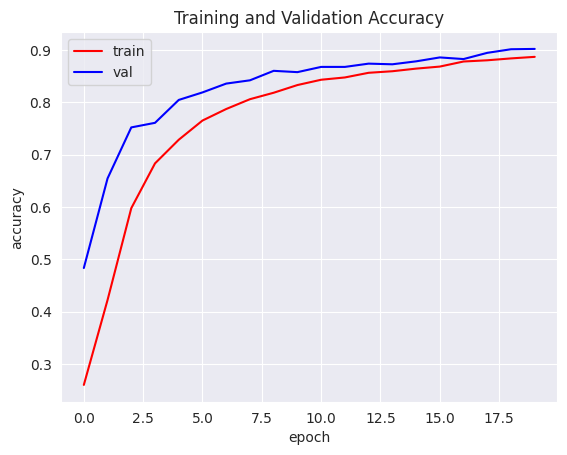

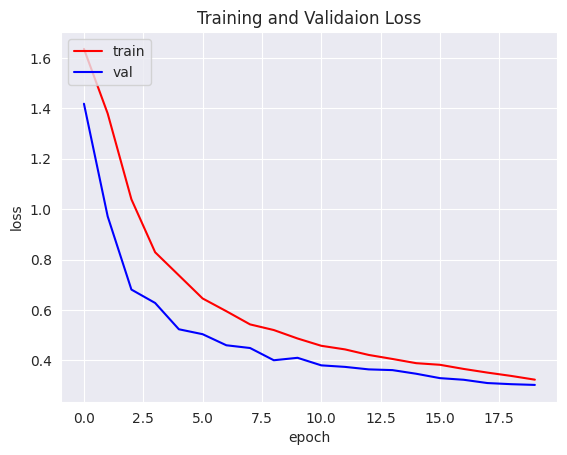

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


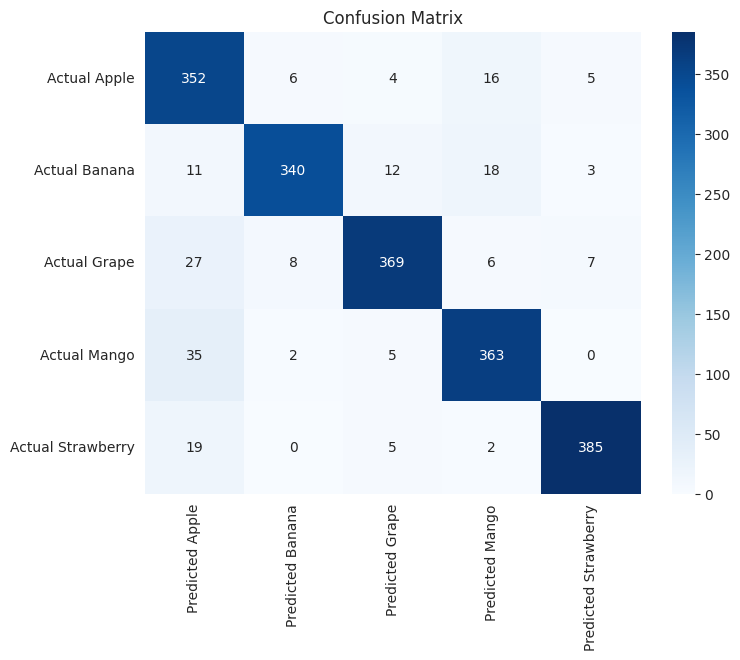


Classification Report:

              precision    recall  f1-score   support

       Apple     0.7928    0.9191    0.8513       383
      Banana     0.9551    0.8854    0.9189       384
       Grape     0.9342    0.8849    0.9089       417
       Mango     0.8963    0.8963    0.8963       405
  Strawberry     0.9625    0.9367    0.9494       411

    accuracy                         0.9045      2000
   macro avg     0.9082    0.9045    0.9050      2000
weighted avg     0.9093    0.9045    0.9056      2000



In [ ]:
#AKURASI TESTING

test_generator.reset()

# Prediksi model
preds_final = clf_model.predict(test_generator, verbose=0)
y_pred = np.argmax(preds_final, axis=1)  # Ambil index kelas tertinggi
y_true = test_generator.classes

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_true, y_pred),
                  index=["Actual Apple", "Actual Banana", "Actual Grape", "Actual Mango", "Actual Strawberry"],
                  columns=["Predicted Apple", "Predicted Banana", "Predicted Grape", "Predicted Mango", "Predicted Strawberry"])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred,
                            target_names=['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'],
                            digits=4))


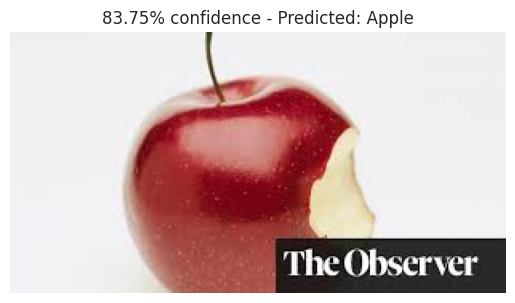

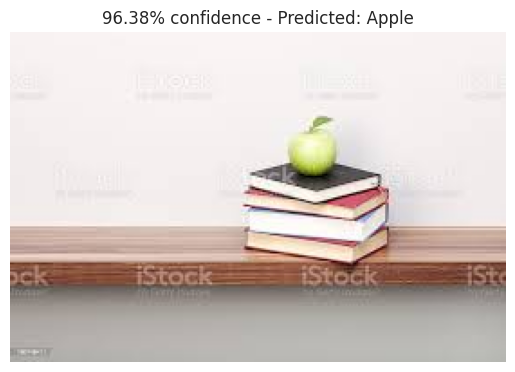

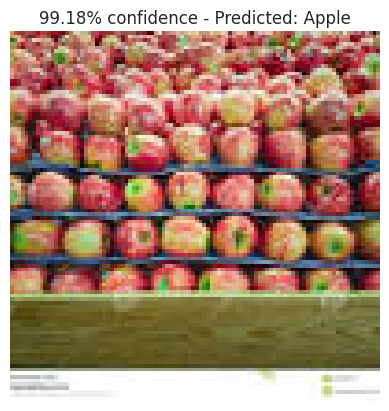

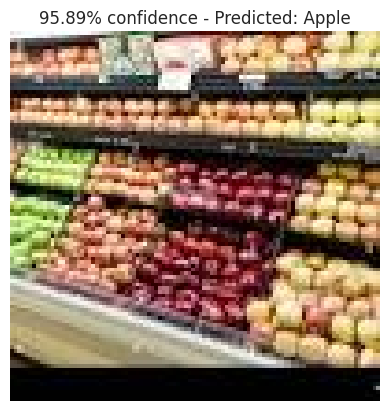

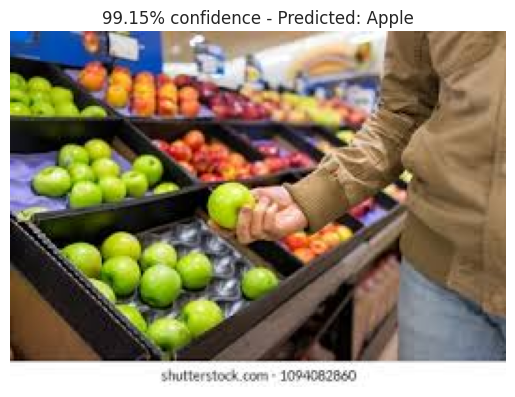

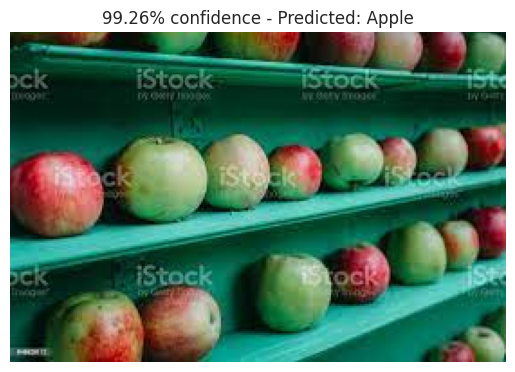

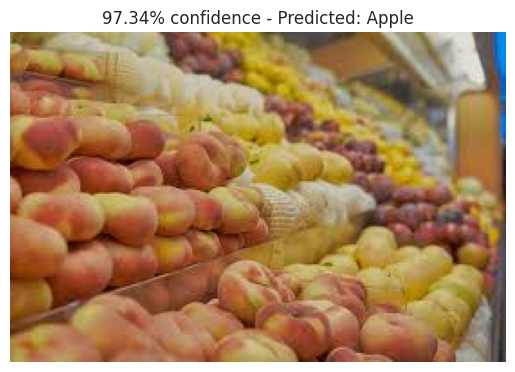

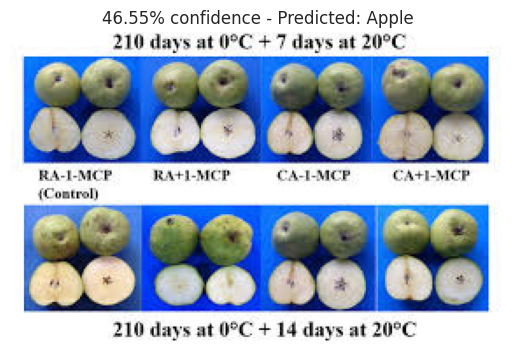

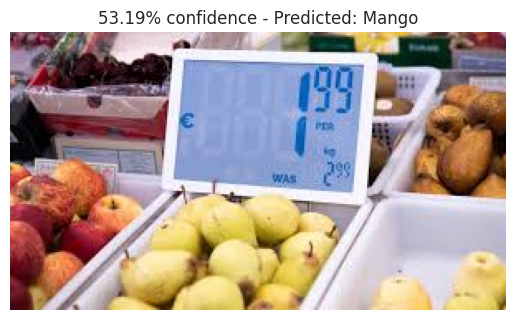

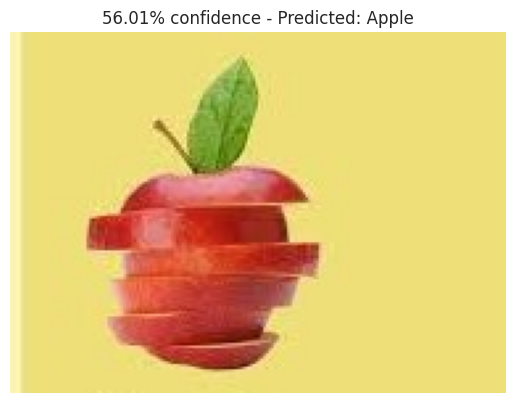

In [ ]:
# Menampilkan prediksi pada gambar dari test_generator
import matplotlib.image as mpimg

for index, probability in enumerate(preds_final[:10]):  # Batasi agar tidak terlalu banyak
    image_path = TEST_DIR + "/" + test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")

    predicted_class = np.argmax(probability)
    confidence = np.max(probability)
    label = test_generator.class_indices
    class_labels = list(label.keys())

    plt.title(f"{confidence*100:.2f}% confidence - Predicted: {class_labels[predicted_class]}")
    plt.show()


Saving fruit_testing.jpg to fruit_testing (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


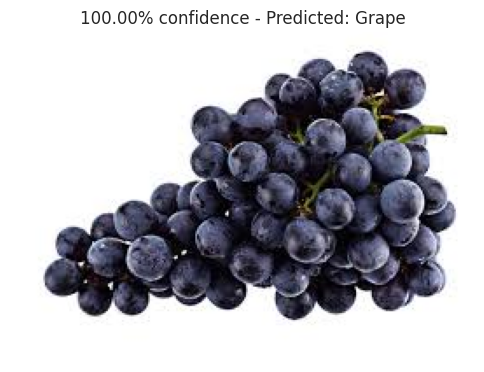

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

class_labels = list(test_generator.class_indices.keys())

for fn in uploaded.keys():
    test_img = image.load_img(fn, target_size=(224, 224))
    pp_test_img = image.img_to_array(test_img)
    pp_test_img = pp_test_img / 255.0
    pp_test_img = np.expand_dims(pp_test_img, axis=0)

    prediction = clf_model.predict(pp_test_img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title(f"{confidence*100:.2f}% confidence - Predicted: {class_labels[predicted_class]}")
    plt.imshow(image.load_img(fn))
    plt.show()


## Konversi Model

In [ ]:
import tensorflow as tf
import os
import shutil
from google.colab import files
import tensorflowjs as tfjs

# === 1️⃣ Buat Direktori Submission ===
submission_dir = "submission"
os.makedirs(f"{submission_dir}/TFJS", exist_ok=True)
os.makedirs(f"{submission_dir}/TF-Lite", exist_ok=True)
os.makedirs(f"{submission_dir}/SavedModel", exist_ok=True)

# === 2️⃣ Simpan Model dalam Format SavedModel (tanpa ekstensi) ===
saved_model_path = os.path.join(submission_dir, "SavedModel")
tf.saved_model.save(clf_model, saved_model_path)
print("✅ Model disimpan sebagai SavedModel")

# === 3️⃣ Konversi ke TF-Lite ===
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Simpan model TF-Lite
tflite_path = f"{submission_dir}/TF-Lite/model.TF-Lite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)
print("✅ Model dikonversi ke TF-Lite")

# Simpan label kelas untuk TF-Lite
class_labels = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
label_path = f"{submission_dir}/TF-Lite/label.txt"
with open(label_path, "w") as f:
    for label in class_labels:
        f.write(label + "\n")
print("✅ Label kelas disimpan dalam label.txt")

# === 4️⃣ Konversi ke TFJS ===
tfjs_path = f"{submission_dir}/TFJS"
tfjs.converters.convert_tf_saved_model(saved_model_path, tfjs_path)
print("✅ Model dikonversi ke TFJS")

# === 5️⃣ ZIP Folder Submission ===
shutil.make_archive("submission", 'zip', "submission")
files.download("submission.zip")
print("✅ Folder submission.zip berhasil dibuat dan siap di-download!")


✅ Model disimpan sebagai SavedModel
✅ Model dikonversi ke TF-Lite
✅ Label kelas disimpan dalam label.txt
✅ Model dikonversi ke TFJS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Folder submission.zip berhasil dibuat dan siap di-download!


In [ ]:
!mkdir -p /content/LibProject

In [ ]:
!ls /content/

 Dataset-Final		    'fruit_testing (1).jpg'   sample_data
 fruits-classification	     fruit_testing.jpg	      submission
 fruits-classification.zip   LibProject		      submission.zip


In [ ]:
!pipreqs /content/LibProject --force --scan-notebooks

INFO: Successfully saved requirements file in /content/LibProject/requirements.txt


In [ ]:
import shutil

# Replace Colab-specific file download with local file handling
source_path = "/content/LibProject/requirements.txt"
destination_path = "./requirements.txt"
shutil.copy(source_path, destination_path)
print(f"Requirements file copied to: {destination_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)